In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_excel('/Users/tiffany/Downloads/Spotify_data.xlsx')
df.shape

(520, 20)

# Data Road 및 전처리
- 문자형 데이터가 많음

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [4]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [5]:
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

In [6]:
# 나이 자체보다는 연령대를 구분해놓음 20~35세가 압도적으로 높음
df['Age'].value_counts()

Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

In [7]:
# 여성이 남성보다 3배 이상 높네? 스포티파이 앱 자체를 여성이 더 많이 쓰는가? 확인해보자 ★
df['Gender'].value_counts()

Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64

- 실제로 한국 론칭 후 21년 3월 이후 꾸준히 사용자 수 증가하는데 
    - 이용자의 60% 이상이 29세 미만의 연령대였으며 성비는 여성이 57.43%로 남성보다 많았다고 함

## 컬럼 별 value_counts
- spotify_usage_period : 1년-2년, 2년 이상, 6개월-1년 대부분 비슷하게 높음, 신규 고객(6개월미만)보다 오래 사용한 유저 수가 더 많음
    - 신규 유저를 모객하기 위해서 어떻게 해야할지 전략 필요
- spotify_listening_device : 스마트폰 압도적으로 높고 다른 기기 함께 사용하는 유저 적음
- spotify_subscription_plan : 구독플랜방법
- 광고를 보더라도 무료로 사용하는 유저 4배이상 높음. 유료 고객 높일 전략 필요. 스포티파이의 BM 확인 필요
- premium_sub_willingness : 유료전환의지유료전환의지
- 이슈다. 유저들이 미래에 돈을 좀 더 내서 프리미엄을 하거나 앞으로 계쏙해서 프리미엄 구독을 유지할 의지가 없다
- preffered_premium_plan : 플랜선호도조사
    - Individual Plan- Rs 119/month (개인 플랜 - 월 119루피): 95명이 이 플랜을 선호합니다.
    - Student Plan-Rs 59/month (학생 플랜 - 월 59루피): 94명이 이 플랜을 선호합니다.
    - Duo plan- Rs 149/month (듀오 플랜 - 월 149루피): 84명이 이 플랜을 선호합니다.
    - Family Plan-Rs 179/month (가족 플랜 - 월 179루피): 39명이 이 플랜을 선호합니다.
    - preferred_listening_content : 선호하는 청취 콘텐츠
- preferred_listening_content : 음악이 훨씬 높음
- fav_music_genre : 좋아하는 음악 장르
    - 멜로디, 클래식, 팝, 등등
- music_time_slot : 음악청취시간대 
    - night>afternoon>morning 
    - 아침에 왜 잘 안들으세요?? (단순 궁금증)


In [8]:
# 모든 컬럼 value_counts()
for column in df.columns:
    print(f"컬럼명: {column}")
    print(df[column].value_counts())
    print("---------------------------------------")

컬럼명: Age
Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64
---------------------------------------
컬럼명: Gender
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64
---------------------------------------
컬럼명: spotify_usage_period
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64
---------------------------------------
컬럼명: spotify_listening_device
spotify_listening_device
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants                                   

## 컬럼명(한글) 바꾸기

In [9]:
new_columns = {
    'Age': '나이',
    'Gender': '성별',
    'spotify_usage_period': '사용기간',
    'spotify_listening_device': '청취 디바이스',
    'spotify_subscription_plan': '구독 플랜',
    'premium_sub_willingness': '프리미엄 구독 의향',
    'preffered_premium_plan': '선호하는 프리미엄 플랜',
    'preferred_listening_content': '선호하는 청취 콘텐츠',
    'fav_music_genre': '좋아하는 음악 장르',
    'music_time_slot': '음악 청취 시간대',
    'music_Influencial_mood': '음악선택에 영향을 미치는 mood',
    'music_lis_frequency': '음악 청취 빈도',
    'music_expl_method': '음악 탐험 방법',
    'music_recc_rating': '음악 추천 평가',
    'pod_lis_frequency': '팟캐스트 청취 빈도',
    'fav_pod_genre': '선호하는 팟캐스트 장르',
    'preffered_pod_format': '선호하는 팟캐스트 형식',
    'pod_host_preference': '선호하는 팟캐스트 호스트',
    'preffered_pod_duration': '선호하는 팟캐스트 길이',
    'pod_variety_satisfaction': '팟캐스트 다양성 만족도'
}

df.rename(columns=new_columns, inplace=True)

In [10]:
df.shape

(520, 20)

In [11]:
# 520개 데이터가 있어야 하는데 팟캐스트 쪽, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   나이                  520 non-null    object
 1   성별                  520 non-null    object
 2   사용기간                520 non-null    object
 3   청취 디바이스             520 non-null    object
 4   구독 플랜               520 non-null    object
 5   프리미엄 구독 의향          520 non-null    object
 6   선호하는 프리미엄 플랜        312 non-null    object
 7   선호하는 청취 콘텐츠         520 non-null    object
 8   좋아하는 음악 장르          520 non-null    object
 9   음악 청취 시간대           520 non-null    object
 10  음악선택에 영향을 미치는 mood  520 non-null    object
 11  음악 청취 빈도            520 non-null    object
 12  음악 탐험 방법            520 non-null    object
 13  음악 추천 평가            520 non-null    int64 
 14  팟캐스트 청취 빈도          520 non-null    object
 15  선호하는 팟캐스트 장르        372 non-null    object
 16  선호하는 팟캐스트 형식        380 no

## 팟캐스트 컬럼 삭제
- 일단 결측치도 많고 딱히 팟캐스트 안궁금
- 유저 데이터, 서비스지표,선호도 조사만 있어도 분석에 문제 없을듯

# 문제 정의
- 데이터에서 발견한 문제
    - 유저 수 ⬆️
        - 남성 사용자가 여성에 비해 적다.
        - 연령대가 20대로, 한정적이다. 다양한 연령대로 확장한다?
        - 신규 유저 모객 : 신규 고객(6개월미만)보다 오래 사용한 유저 수가 더 많음 
    - 수익 ⬆️
        - 광고를 보더라도 무료로 사용하는 유저 4배이상 높음. 유료 고객 높일 전략 필요. 스포티파이의 BM 확인 필요
        - 유료전환의지 적음 : 유저들이 미래에 돈을 좀 더 내서 프리미엄을 하거나 앞으로 계쏙해서 프리미엄 구독을 유지할 의지가 없다

# EDA
- 성별/연령대 별로 차이점 확인 (서비스 지표, 선호도 조사)
- 사용기간 신규유저/장기 유저간의 차이점 확인 (서비스 지표로)
- 유료로 전환하거나 지속할 의향이 있다고 한 사람들은 왜 그랬을지 확인

## Spotify 사용자의 연령, 성별 분포

In [12]:
df['나이'].value_counts()

나이
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

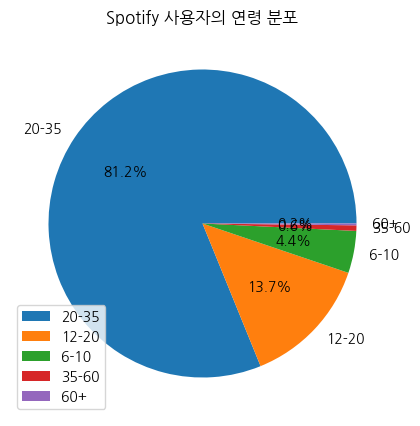

In [13]:
y=df['나이'].value_counts()
plt.figure(figsize=(5,5))
labels=['20-35','12-20','6-10','35-60','60+']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Spotify 사용자의 연령 분포')
plt.show()

In [14]:
df['성별'].value_counts()

성별
Female    391
Male      114
Others     15
Name: count, dtype: int64

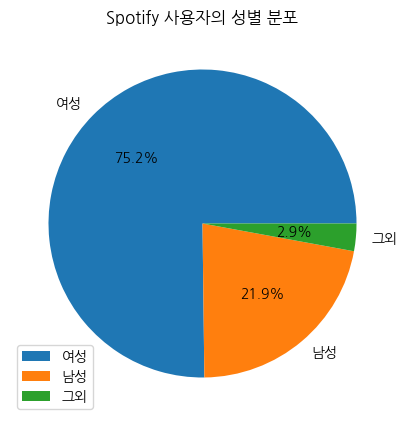

In [15]:
y=df['성별'].value_counts()
plt.figure(figsize=(5,5))
labels=['여성', '남성', '그외']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Spotify 사용자의 성별 분포')
plt.show()

<Axes: title={'center': 'Spotify 사용자의 연령대별 성별 분포'}, xlabel='나이', ylabel='count'>

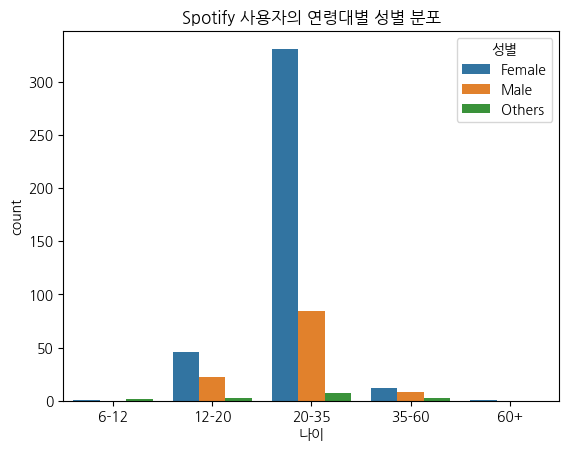

In [16]:
plt.title('Spotify 사용자의 연령대별 성별 분포')
sns.countplot(x='나이', data=df, hue='성별', order=['6-12', '12-20', '20-35', '35-60', '60+'])

## 성별 별로 차이점 확인 (서비스 지표, 선호도 조사)

### 서비스 지표

Text(0.5, 1.0, '성별 별 음악 청취 시간대')

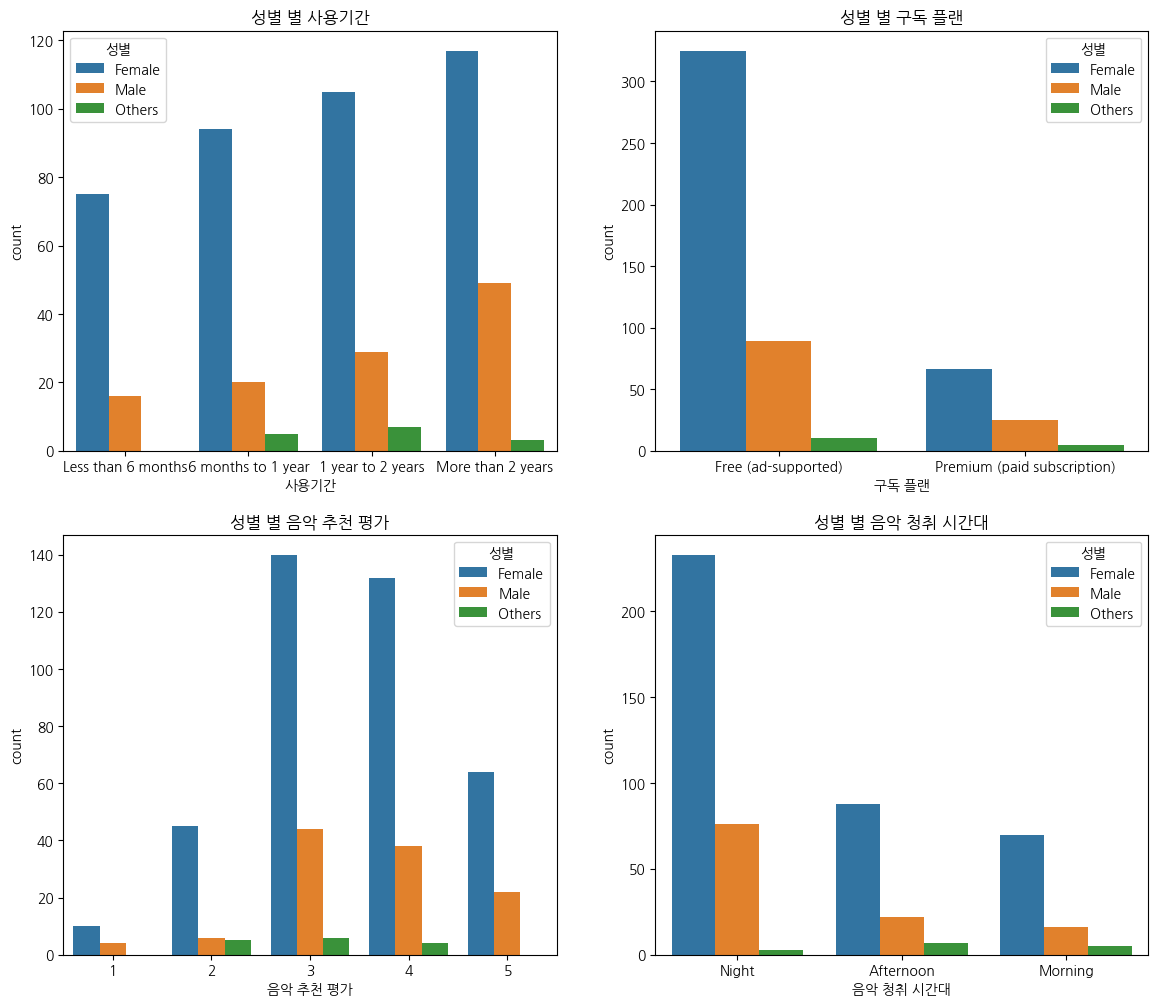

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='사용기간', data=df, hue='성별', 
              order=['Less than 6 months', '6 months to 1 year', '1 year to 2 years', 'More than 2 years'],
              ax=axes[0, 0])
axes[0, 0].set_title('성별 별 사용기간')

sns.countplot(x='구독 플랜', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('성별 별 구독 플랜')

sns.countplot(x='음악 추천 평가', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('성별 별 음악 추천 평가')

sns.countplot(x='음악 청취 시간대', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('성별 별 음악 청취 시간대')


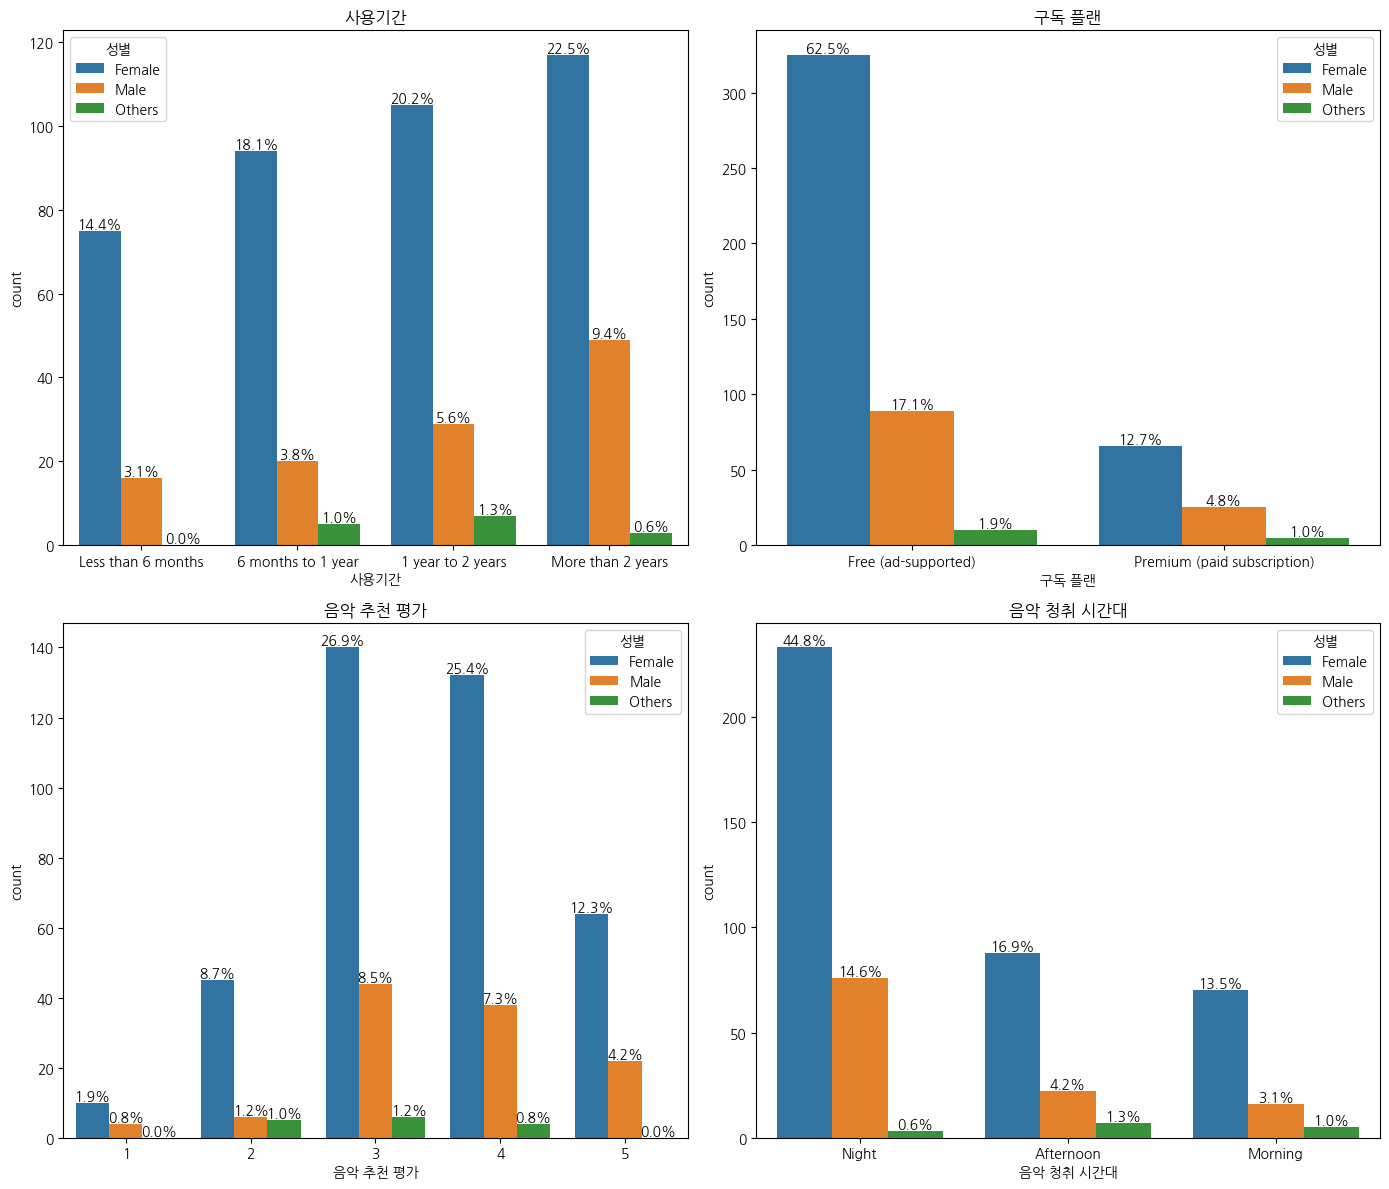

In [18]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='사용기간', data=df, hue='성별', order=['Less than 6 months', '6 months to 1 year', '1 year to 2 years', 'More than 2 years'], ax=axes[0, 0])
axes[0, 0].set_title('사용기간')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='구독 플랜', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('구독 플랜')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='음악 추천 평가', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('음악 추천 평가')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='음악 청취 시간대', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('음악 청취 시간대')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [19]:
# 성별, 구독 플랜 수 궁금
df.groupby(['구독 플랜', '성별']).size().reset_index(name='Count')

,구독 플랜,성별,Count
0,Free (ad-supported),Female,325
1,Free (ad-supported),Male,89
2,Free (ad-supported),Others,10
3,Premium (paid subscription),Female,66
4,Premium (paid subscription),Male,25
5,Premium (paid subscription),Others,5


In [20]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='음악 추천 평가', columns='성별', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

성별,음악 추천 평가,Female,Male,Others
0,1,0.025575,0.035088,0.000000
1,2,0.115090,0.052632,0.333333
2,3,0.358056,0.385965,0.400000
3,4,0.337596,0.333333,0.266667
4,5,0.163683,0.192982,0.000000


<Axes: xlabel='음악 추천 평가', ylabel='Female'>

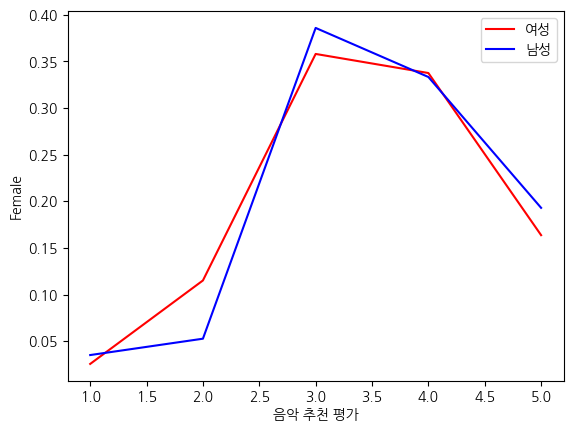

In [21]:
sns.lineplot(data=temp, x='음악 추천 평가', y='Female', color='red', label ='여성')
sns.lineplot(data=temp, x='음악 추천 평가', y='Male', color='blue', label='남성')

In [22]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='음악 청취 시간대', columns='성별', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

성별,음악 청취 시간대,Female,Male,Others
0,Afternoon,0.225064,0.192982,0.466667
1,Morning,0.179028,0.140351,0.333333
2,Night,0.595908,0.666667,0.200000


<Axes: xlabel='음악 청취 시간대', ylabel='Female'>

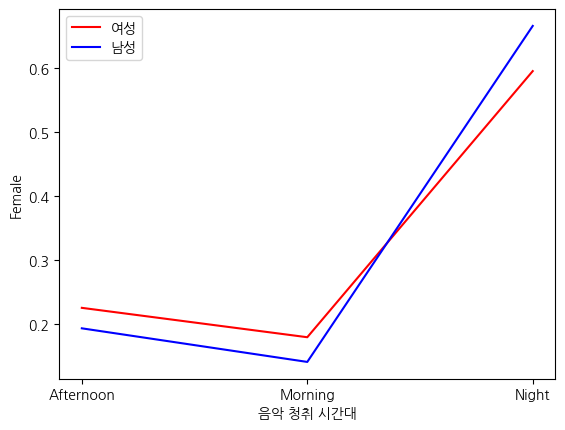

In [23]:
sns.lineplot(data=temp, x='음악 청취 시간대', y='Female', color='red', label ='여성')
sns.lineplot(data=temp, x='음악 청취 시간대', y='Male', color='blue', label='남성')

### 선호도 조사

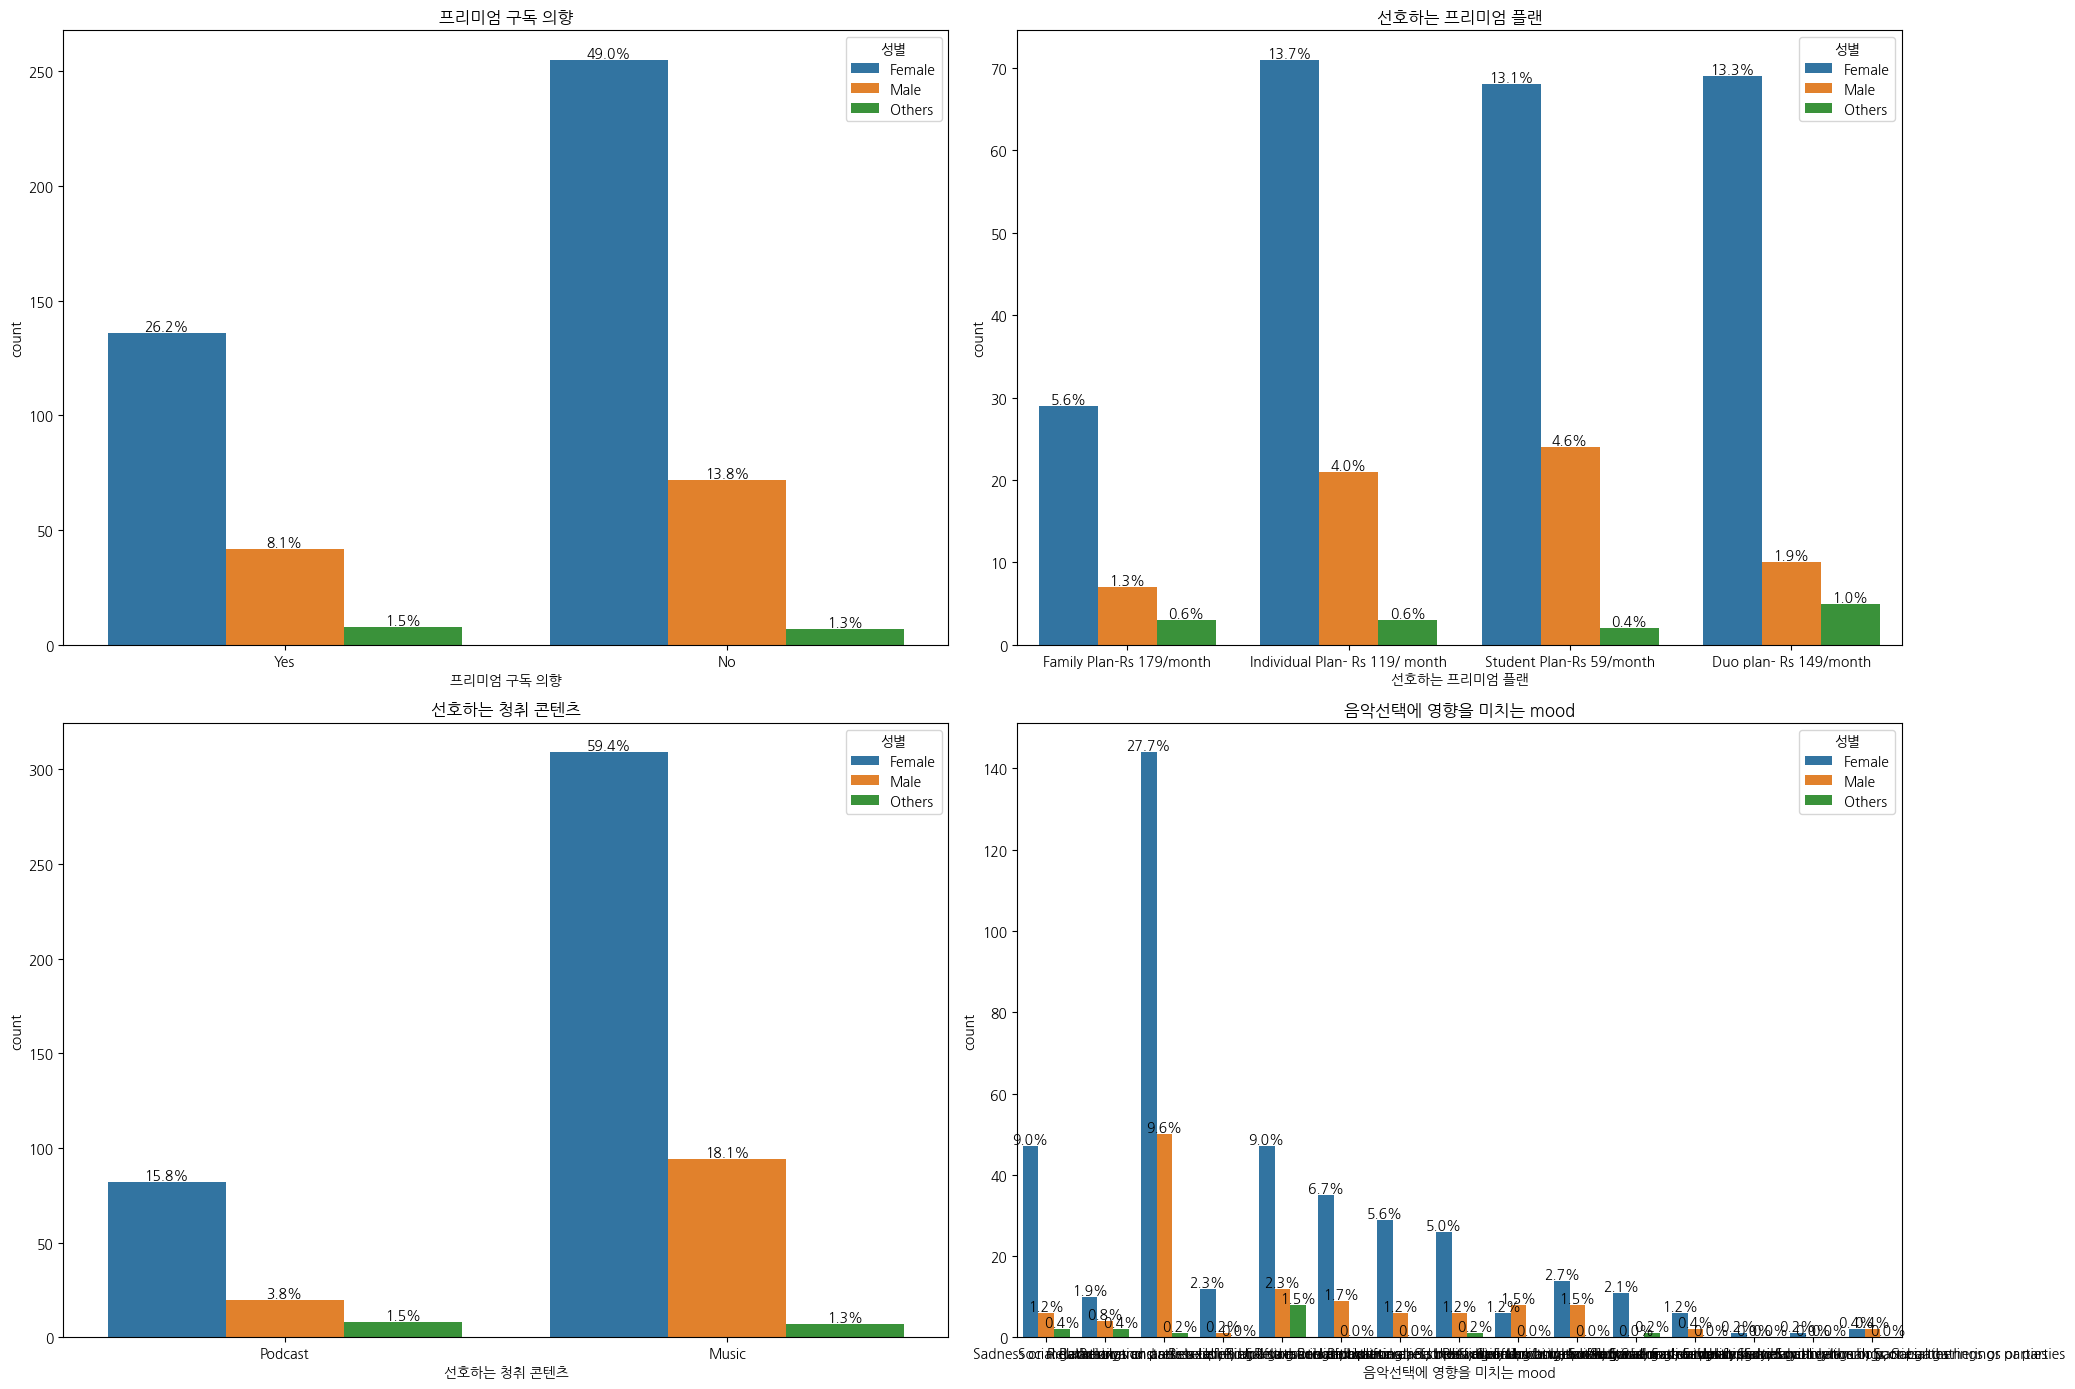

In [24]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 14))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='프리미엄 구독 의향', data=df, hue='성별', ax=axes[0, 0])
axes[0, 0].set_title('프리미엄 구독 의향')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 프리미엄 플랜', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('선호하는 프리미엄 플랜')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 청취 콘텐츠', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 청취 콘텐츠')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='음악선택에 영향을 미치는 mood', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('음악선택에 영향을 미치는 mood')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 팟캐스트

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   나이                  520 non-null    object
 1   성별                  520 non-null    object
 2   사용기간                520 non-null    object
 3   청취 디바이스             520 non-null    object
 4   구독 플랜               520 non-null    object
 5   프리미엄 구독 의향          520 non-null    object
 6   선호하는 프리미엄 플랜        312 non-null    object
 7   선호하는 청취 콘텐츠         520 non-null    object
 8   좋아하는 음악 장르          520 non-null    object
 9   음악 청취 시간대           520 non-null    object
 10  음악선택에 영향을 미치는 mood  520 non-null    object
 11  음악 청취 빈도            520 non-null    object
 12  음악 탐험 방법            520 non-null    object
 13  음악 추천 평가            520 non-null    int64 
 14  팟캐스트 청취 빈도          520 non-null    object
 15  선호하는 팟캐스트 장르        372 non-null    object
 16  선호하는 팟캐스트 형식        380 no

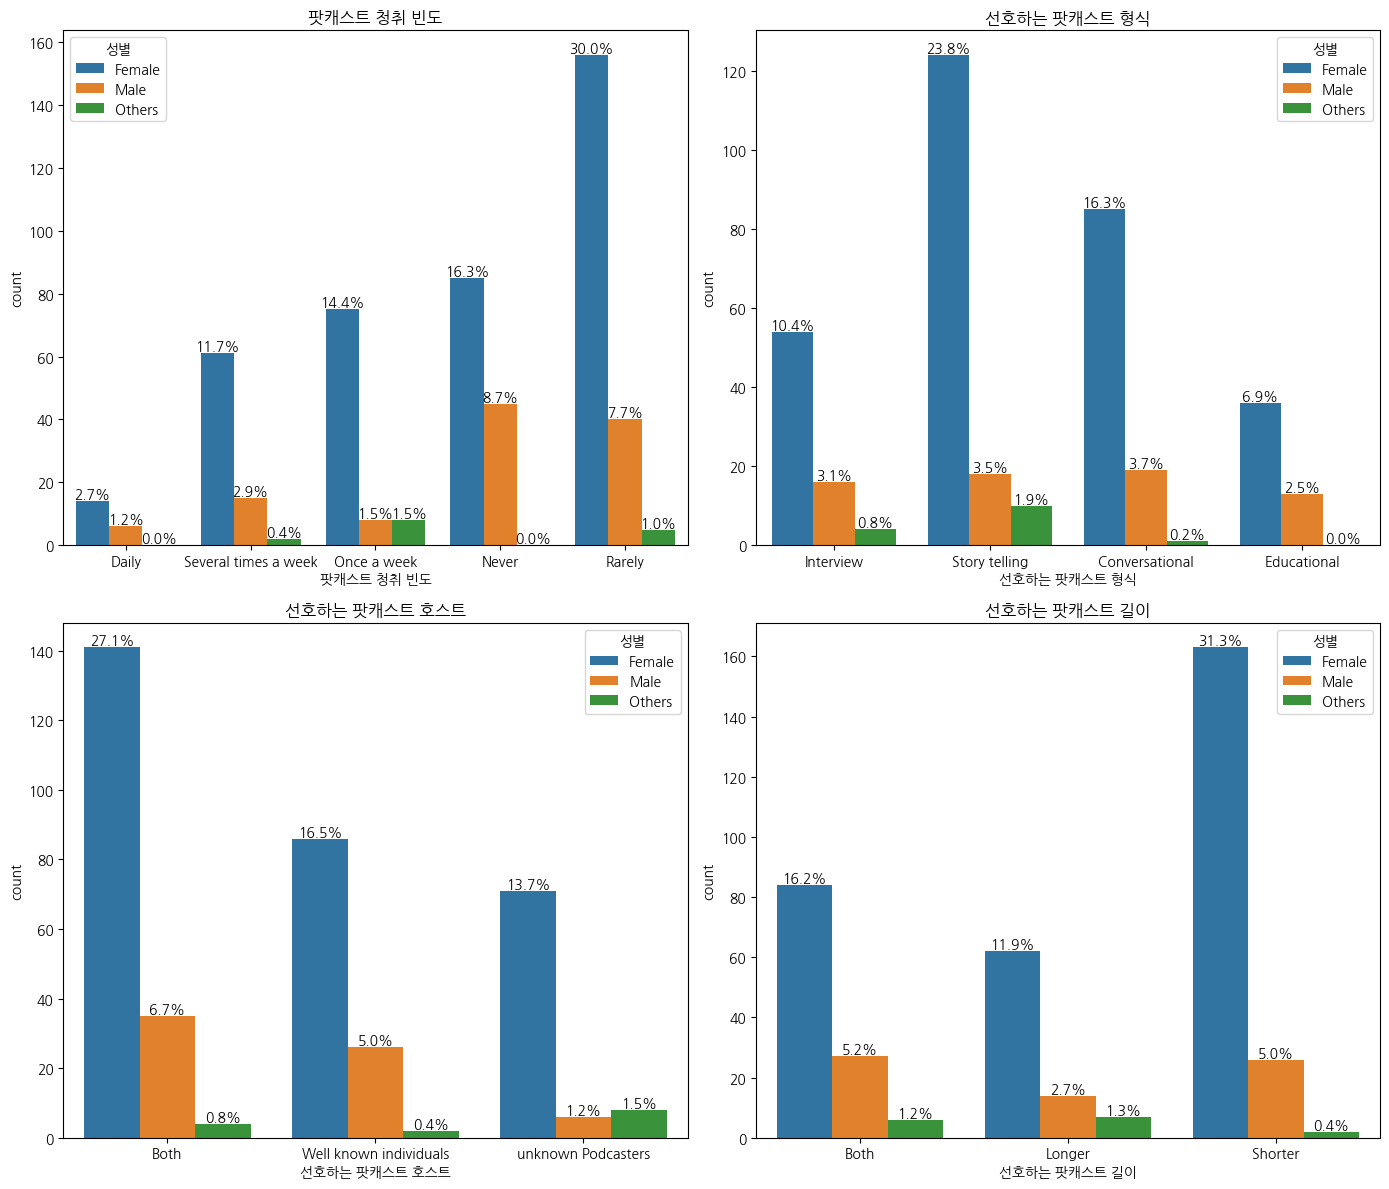

In [26]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='팟캐스트 청취 빈도', data=df, hue='성별', ax=axes[0, 0])
axes[0, 0].set_title('팟캐스트 청취 빈도')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 팟캐스트 형식', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('선호하는 팟캐스트 형식')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 팟캐스트 호스트', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 팟캐스트 호스트')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='선호하는 팟캐스트 길이', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('선호하는 팟캐스트 길이')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


## 사용기간 신규유저/장기 유저간의 차이점 확인 (서비스 지표로)

In [27]:
df['신규유저 유무'] = 'X'
df.loc[df['사용기간']== 'Less than 6 months', '신규유저 유무'] = 'O'

In [28]:
df['신규유저 유무'].value_counts()

신규유저 유무
X    429
O     91
Name: count, dtype: int64

In [29]:
df['사용기간'].value_counts().sort_index()


사용기간
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
More than 2 years     169
Name: count, dtype: int64

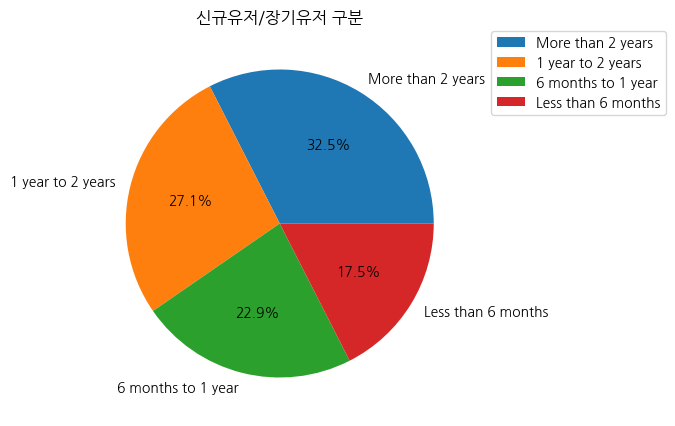

In [30]:
y=df['사용기간'].value_counts()
plt.figure(figsize=(5,5))
labels= ['More than 2 years', '1 year to 2 years', '6 months to 1 year', 'Less than 6 months']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('신규유저/장기유저 구분')
plt.show()

### 서비스 지표

Text(0.5, 1.0, '사용기간 별 음악 청취 시간대')

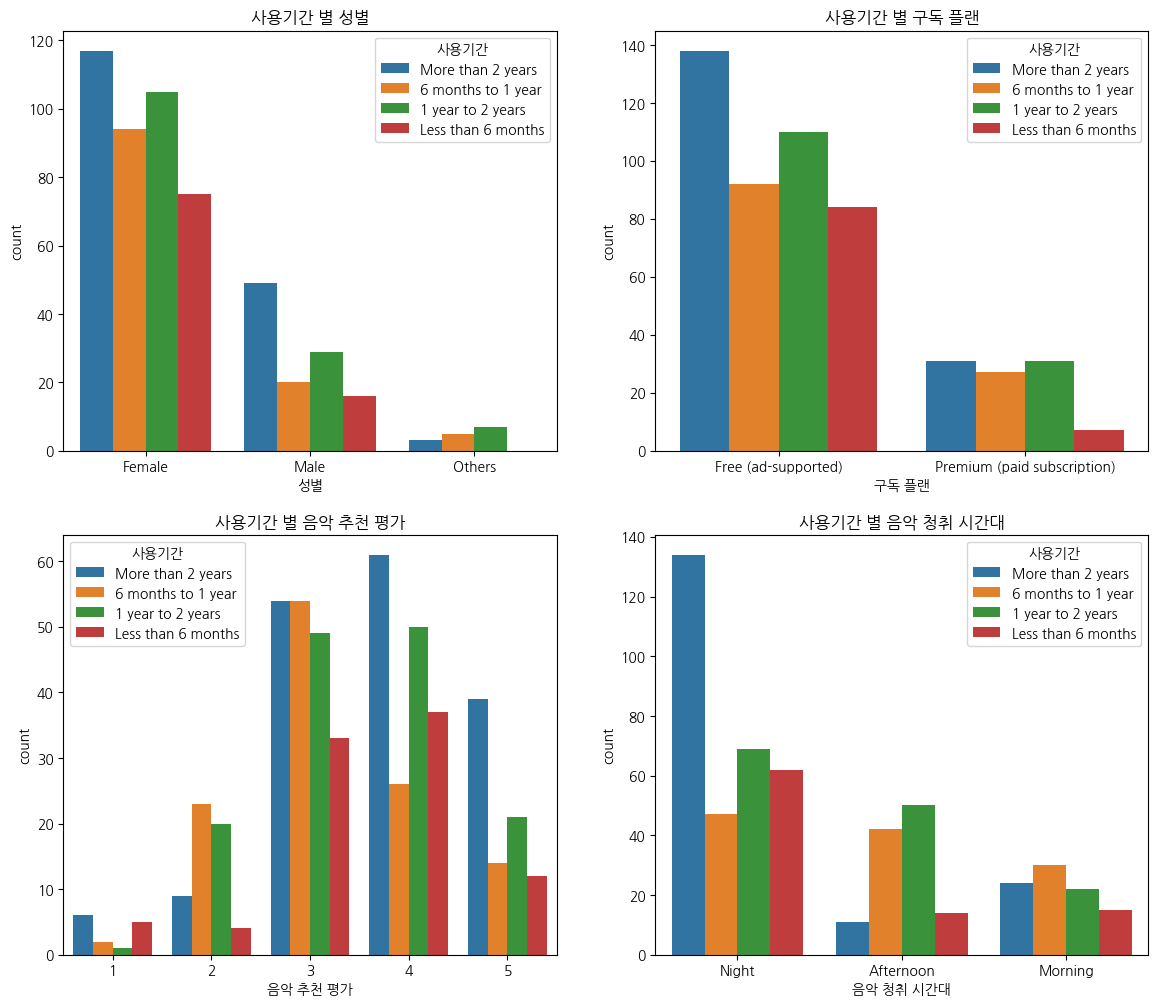

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='성별', data=df, hue='사용기간', ax=axes[0, 0])
axes[0, 0].set_title('사용기간 별 성별')

sns.countplot(x='구독 플랜', data=df, hue='사용기간', ax=axes[0, 1])
axes[0, 1].set_title('사용기간 별 구독 플랜')

sns.countplot(x='음악 추천 평가', data=df, hue='사용기간', ax=axes[1, 0])
axes[1, 0].set_title('사용기간 별 음악 추천 평가')

sns.countplot(x='음악 청취 시간대', data=df, hue='사용기간', ax=axes[1, 1])
axes[1, 1].set_title('사용기간 별 음악 청취 시간대')


### 선호도 조사

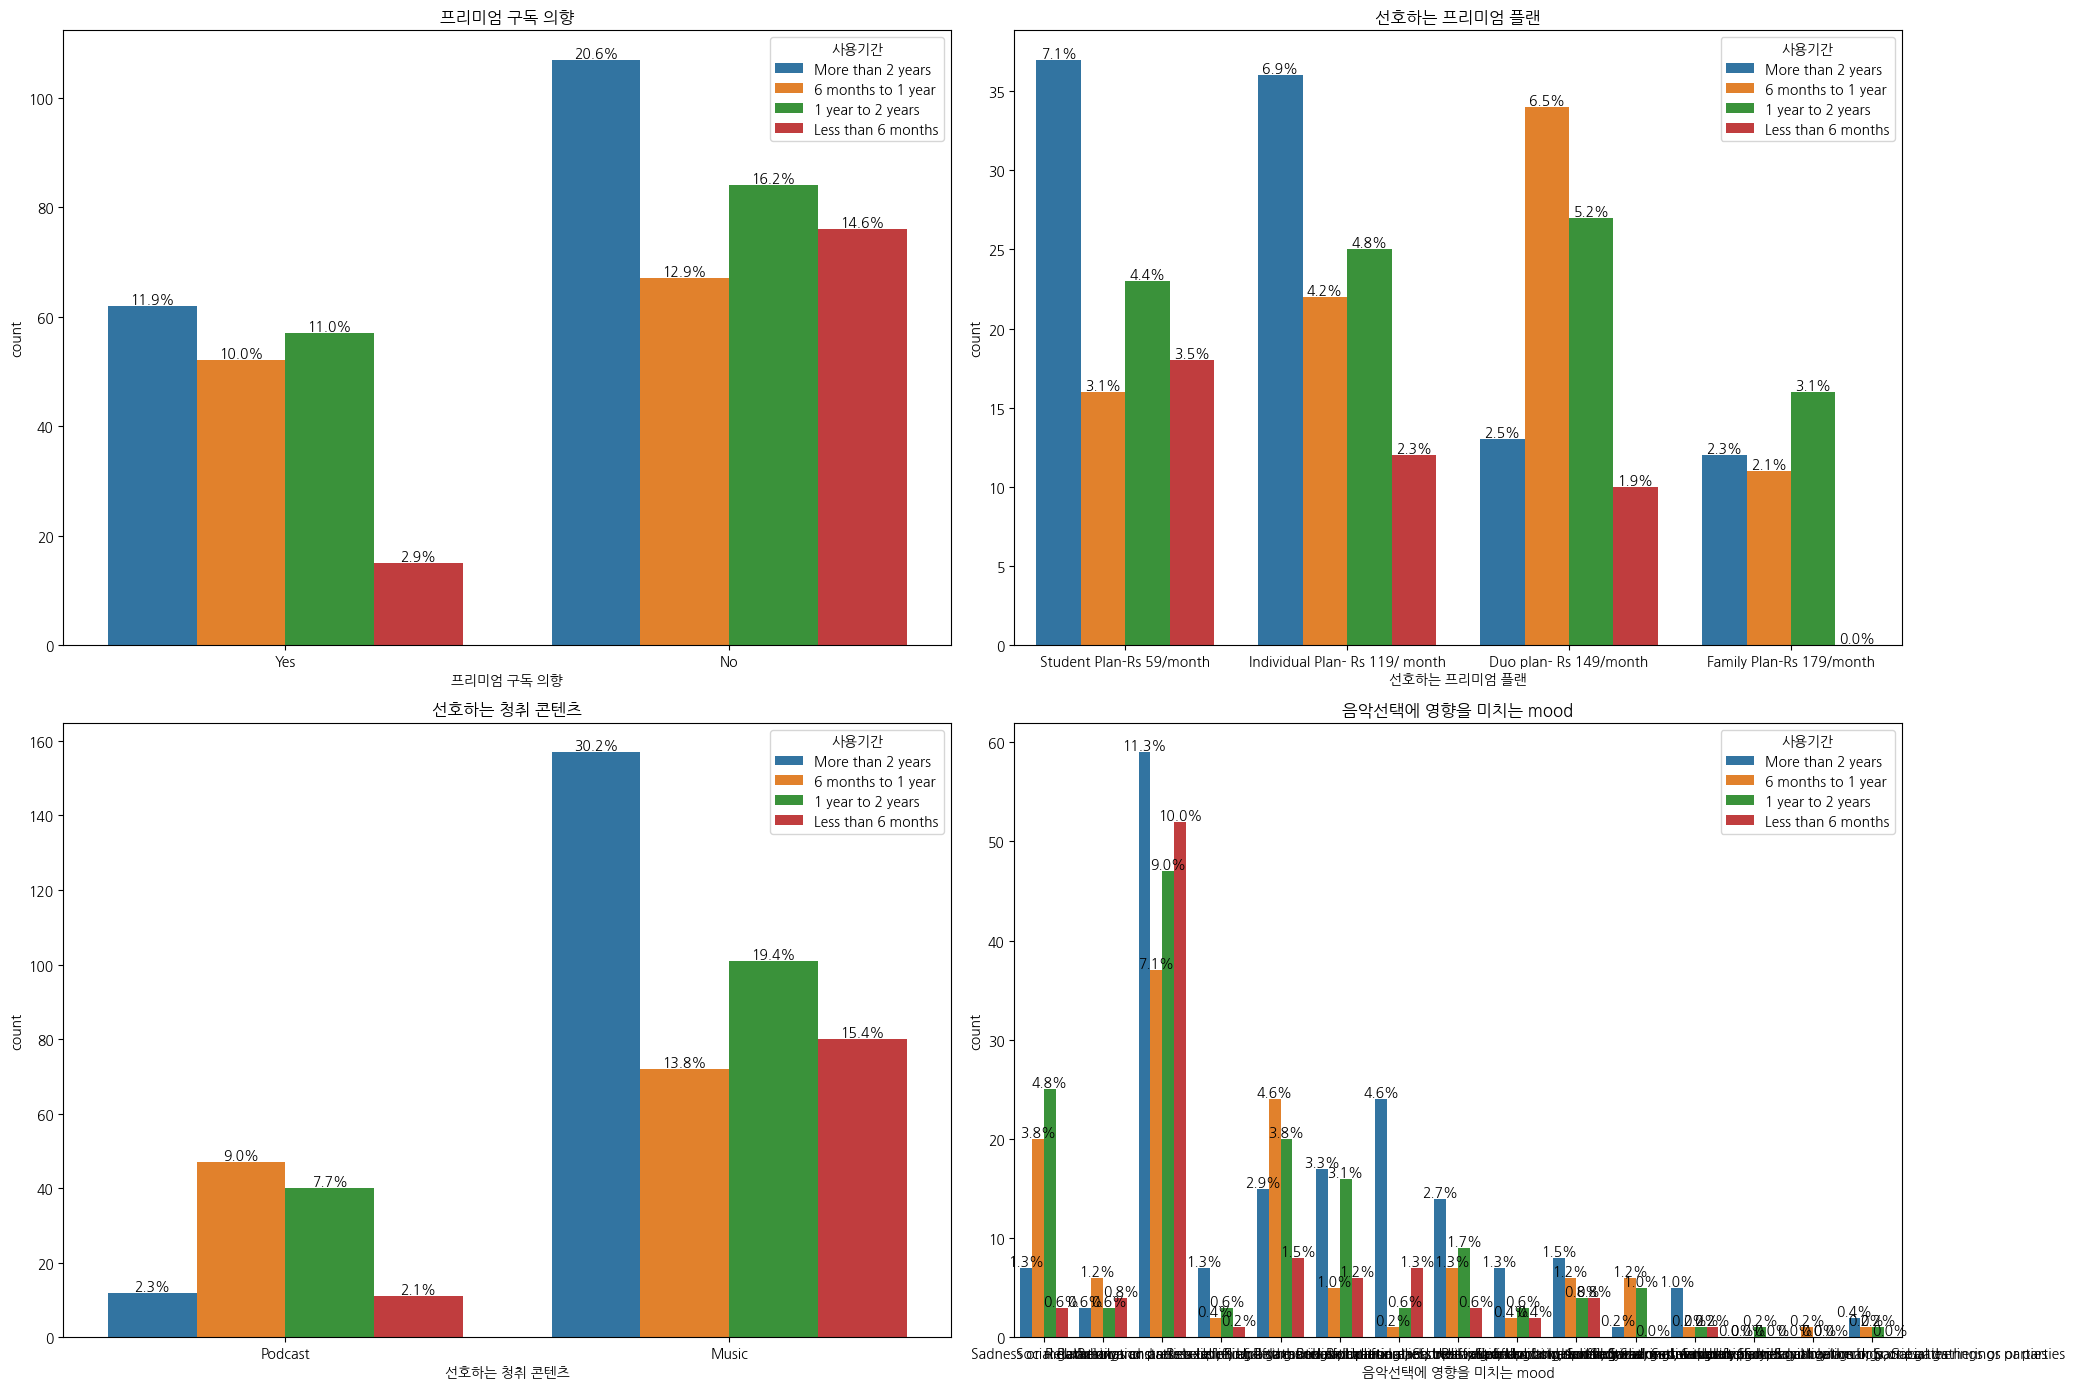

In [32]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 14))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='프리미엄 구독 의향', data=df, hue='사용기간', ax=axes[0, 0])
axes[0, 0].set_title('프리미엄 구독 의향')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 프리미엄 플랜', data=df, hue='사용기간', 
                    order = ['Student Plan-Rs 59/month', 'Individual Plan- Rs 119/ month', 'Duo plan- Rs 149/month', 'Family Plan-Rs 179/month'],
                    ax=axes[0, 1])
axes[0, 1].set_title('선호하는 프리미엄 플랜')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 청취 콘텐츠', data=df, hue='사용기간', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 청취 콘텐츠')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='음악선택에 영향을 미치는 mood', data=df, hue='사용기간', ax=axes[1, 1])
axes[1, 1].set_title('음악선택에 영향을 미치는 mood')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 팟캐스트

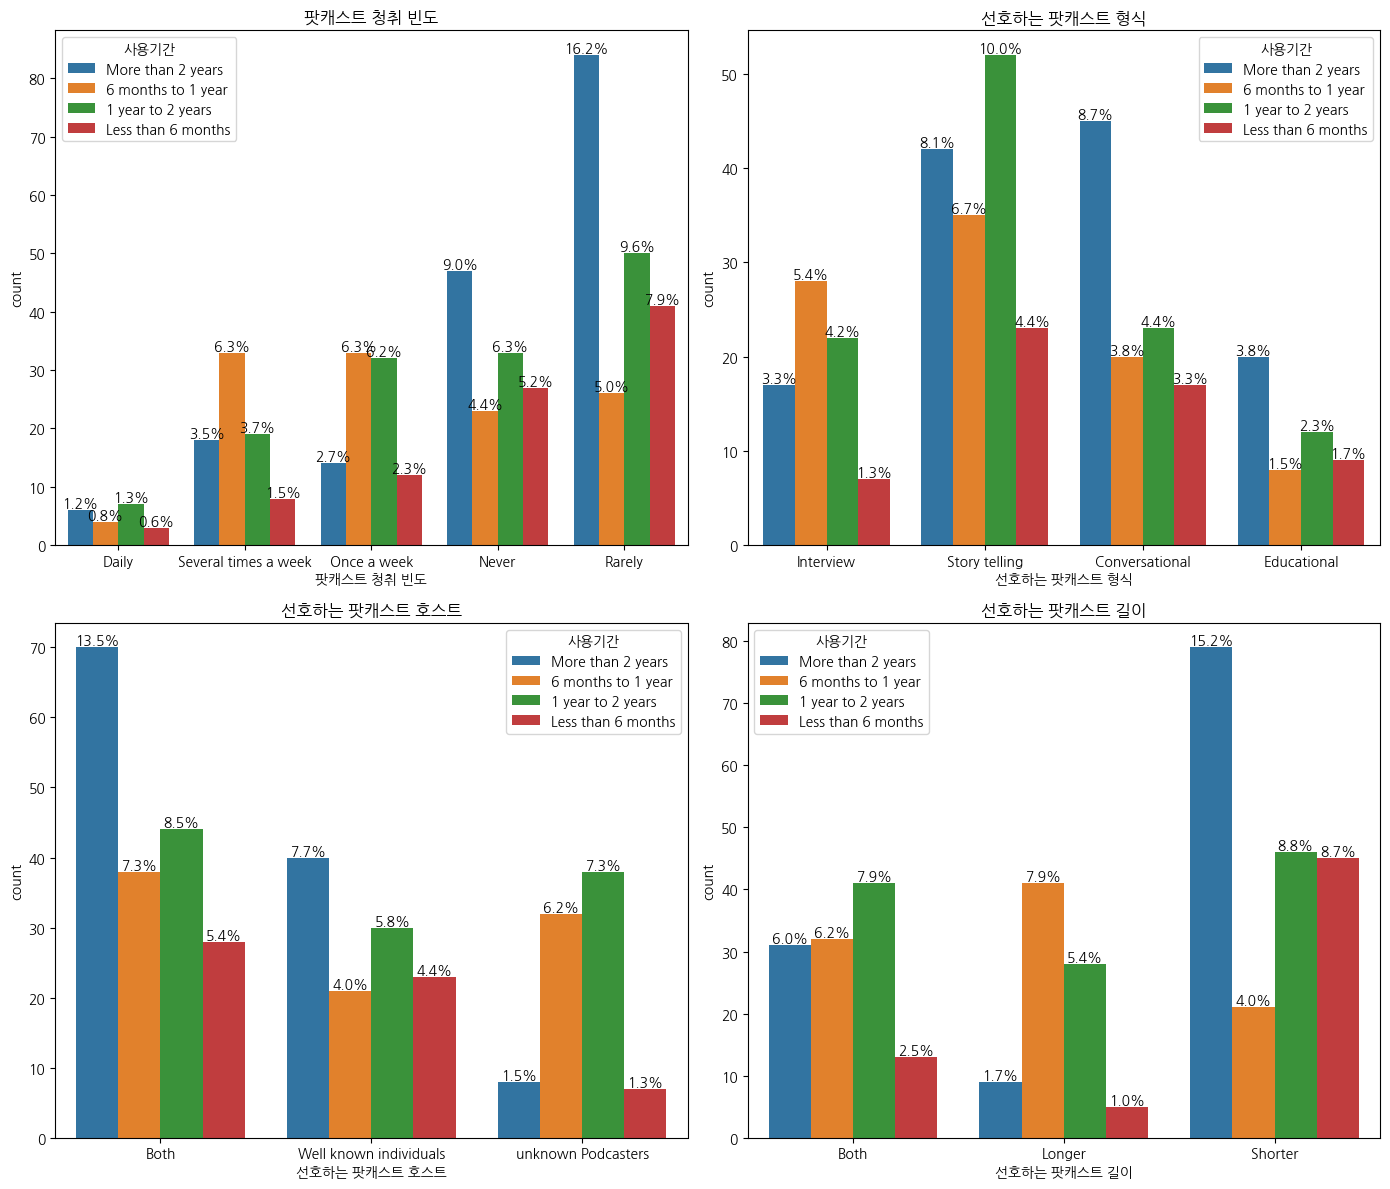

In [33]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='팟캐스트 청취 빈도', data=df, hue='사용기간', ax=axes[0, 0])
axes[0, 0].set_title('팟캐스트 청취 빈도')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 팟캐스트 형식', data=df, hue='사용기간', ax=axes[0, 1])
axes[0, 1].set_title('선호하는 팟캐스트 형식')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 팟캐스트 호스트', data=df, hue='사용기간', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 팟캐스트 호스트')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='선호하는 팟캐스트 길이', data=df, hue='사용기간', ax=axes[1, 1])
axes[1, 1].set_title('선호하는 팟캐스트 길이')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


## 유료 구매 의향 있는 유저들은 왜?


In [34]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='음악 추천 평가', columns='프리미엄 구독 의향', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

프리미엄 구독 의향,음악 추천 평가,No,Yes
0,1,0.026946,0.026882
1,2,0.089820,0.139785
2,3,0.350299,0.392473
3,4,0.371257,0.268817
4,5,0.161677,0.172043


<Axes: xlabel='음악 추천 평가', ylabel='No'>

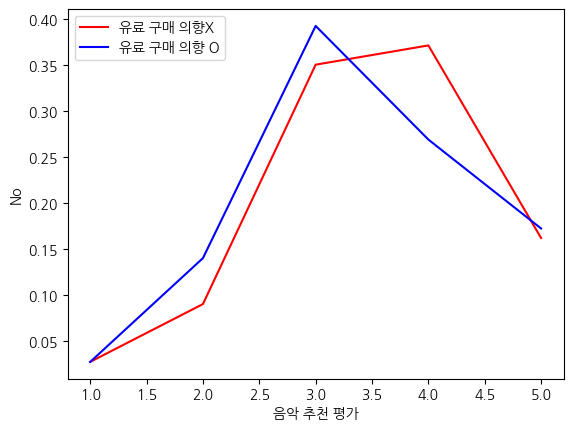

In [35]:
sns.lineplot(data=temp, x='음악 추천 평가', y='No', color='red', label ='유료 구매 의향X')
sns.lineplot(data=temp, x='음악 추천 평가', y='Yes', color='blue', label='유료 구매 의향 O')

In [36]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='구독 플랜', columns='프리미엄 구독 의향', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

프리미엄 구독 의향,구독 플랜,No,Yes
0,Free (ad-supported),0.928144,0.612903
1,Premium (paid subscription),0.071856,0.387097


Text(0.5, 1.0, '프리미엄 구독 의향 별 음악 청취 시간대')

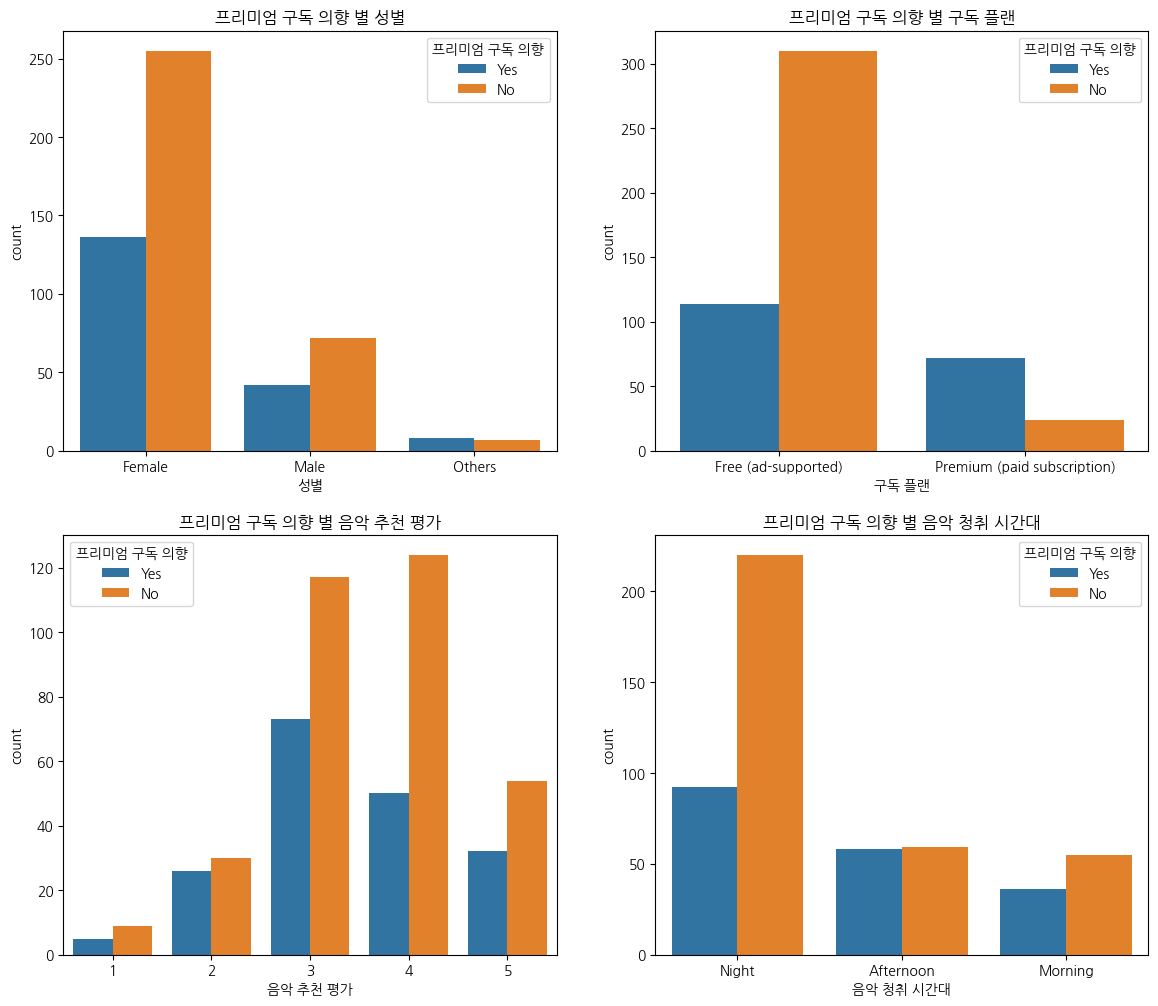

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='성별', data=df, hue='프리미엄 구독 의향', ax=axes[0, 0])
axes[0, 0].set_title('프리미엄 구독 의향 별 성별')

sns.countplot(x='구독 플랜', data=df, hue='프리미엄 구독 의향', ax=axes[0, 1])
axes[0, 1].set_title('프리미엄 구독 의향 별 구독 플랜')

sns.countplot(x='음악 추천 평가', data=df, hue='프리미엄 구독 의향', ax=axes[1, 0])
axes[1, 0].set_title('프리미엄 구독 의향 별 음악 추천 평가')

sns.countplot(x='음악 청취 시간대', data=df, hue='프리미엄 구독 의향', ax=axes[1, 1])
axes[1, 1].set_title('프리미엄 구독 의향 별 음악 청취 시간대')


## 상관계수 (피어슨)

In [38]:
df.columns

Index(['나이', '성별', '사용기간', '청취 디바이스', '구독 플랜', '프리미엄 구독 의향', '선호하는 프리미엄 플랜',
       '선호하는 청취 콘텐츠', '좋아하는 음악 장르', '음악 청취 시간대', '음악선택에 영향을 미치는 mood',
       '음악 청취 빈도', '음악 탐험 방법', '음악 추천 평가', '팟캐스트 청취 빈도', '선호하는 팟캐스트 장르',
       '선호하는 팟캐스트 형식', '선호하는 팟캐스트 호스트', '선호하는 팟캐스트 길이', '팟캐스트 다양성 만족도',
       '신규유저 유무'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   나이                  520 non-null    object
 1   성별                  520 non-null    object
 2   사용기간                520 non-null    object
 3   청취 디바이스             520 non-null    object
 4   구독 플랜               520 non-null    object
 5   프리미엄 구독 의향          520 non-null    object
 6   선호하는 프리미엄 플랜        312 non-null    object
 7   선호하는 청취 콘텐츠         520 non-null    object
 8   좋아하는 음악 장르          520 non-null    object
 9   음악 청취 시간대           520 non-null    object
 10  음악선택에 영향을 미치는 mood  520 non-null    object
 11  음악 청취 빈도            520 non-null    object
 12  음악 탐험 방법            520 non-null    object
 13  음악 추천 평가            520 non-null    int64 
 14  팟캐스트 청취 빈도          520 non-null    object
 15  선호하는 팟캐스트 장르        372 non-null    object
 16  선호하는 팟캐스트 형식        380 no

In [40]:
temp = df.copy()

In [41]:

# Label Encoding을 위한 함수 정의
def label_encode_column(column):
    le = LabelEncoder()
    encoded_column = le.fit_transform(column)
    encoding_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return encoded_column, encoding_mapping

# 여러 컬럼에 대해 Label Encoding 수행
columns_to_encode = ['나이', '성별', '사용기간', '청취 디바이스', '구독 플랜', '프리미엄 구독 의향', '선호하는 프리미엄 플랜',
       '선호하는 청취 콘텐츠', '좋아하는 음악 장르', '음악 청취 시간대', '음악선택에 영향을 미치는 mood',
       '음악 청취 빈도', '음악 탐험 방법', '팟캐스트 청취 빈도', '선호하는 팟캐스트 장르',
       '선호하는 팟캐스트 형식', '선호하는 팟캐스트 호스트', '선호하는 팟캐스트 길이', '팟캐스트 다양성 만족도',
       '신규유저 유무']

encoded_mapping_dict = {}
for column in columns_to_encode:
    temp[column], encoding_mapping = label_encode_column(temp[column])
    encoded_mapping_dict[column] = encoding_mapping

# 결과 출력
print("\n인코딩된 값 매핑:")
for column, mapping in encoded_mapping_dict.items():
    print(f"{column}: {mapping}\n")



인코딩된 값 매핑:
나이: {'12-20': 0, '20-35': 1, '35-60': 2, '6-12': 3, '60+': 4}

성별: {'Female': 0, 'Male': 1, 'Others': 2}

사용기간: {'1 year to 2 years': 0, '6 months to 1 year': 1, 'Less than 6 months': 2, 'More than 2 years': 3}

청취 디바이스: {'Computer or laptop': 0, 'Computer or laptop, Smart speakers or voice assistants': 1, 'Computer or laptop, Smart speakers or voice assistants, Wearable devices': 2, 'Computer or laptop, Wearable devices': 3, 'Smart speakers or voice assistants': 4, 'Smart speakers or voice assistants, Wearable devices': 5, 'Smartphone': 6, 'Smartphone, Computer or laptop': 7, 'Smartphone, Computer or laptop, Smart speakers or voice assistants': 8, 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices': 9, 'Smartphone, Computer or laptop, Wearable devices': 10, 'Smartphone, Smart speakers or voice assistants': 11, 'Smartphone, Smart speakers or voice assistants, Wearable devices': 12, 'Smartphone, Wearable devices': 13, 'Wearable devices': 14

In [42]:
temp

,나이,성별,사용기간,청취 디바이스,구독 플랜,프리미엄 구독 의향,선호하는 프리미엄 플랜,선호하는 청취 콘텐츠,좋아하는 음악 장르,음악 청취 시간대,...,음악 청취 빈도,음악 탐험 방법,음악 추천 평가,팟캐스트 청취 빈도,선호하는 팟캐스트 장르,선호하는 팟캐스트 형식,선호하는 팟캐스트 호스트,선호하는 팟캐스트 길이,팟캐스트 다양성 만족도,신규유저 유무
0,1,0,3,4,0,1,1,1,4,2,...,34,4,3,0,1,2,0,0,1,1
1,0,1,3,0,0,1,2,1,7,0,...,32,4,2,4,1,2,0,3,2,1
2,2,2,1,4,0,1,3,1,6,2,...,19,4,4,2,16,2,3,0,2,1
3,1,0,0,11,0,0,4,0,4,2,...,13,13,4,1,19,4,3,3,1,1
4,1,0,0,6,0,0,4,0,4,2,...,34,13,4,3,10,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,3,10,0,1,3,0,6,1,...,26,10,5,3,10,0,0,2,1,1
516,1,0,3,7,0,1,3,0,6,2,...,29,0,2,3,1,3,0,2,1,1
517,1,0,3,6,0,0,3,0,6,2,...,34,10,3,1,19,3,0,2,1,1
518,1,0,1,6,1,1,2,0,4,2,...,33,11,2,4,1,0,0,1,2,1


In [43]:
# 상관관계 행렬 구하기
correlation_matrix = temp.corr()

<Axes: >

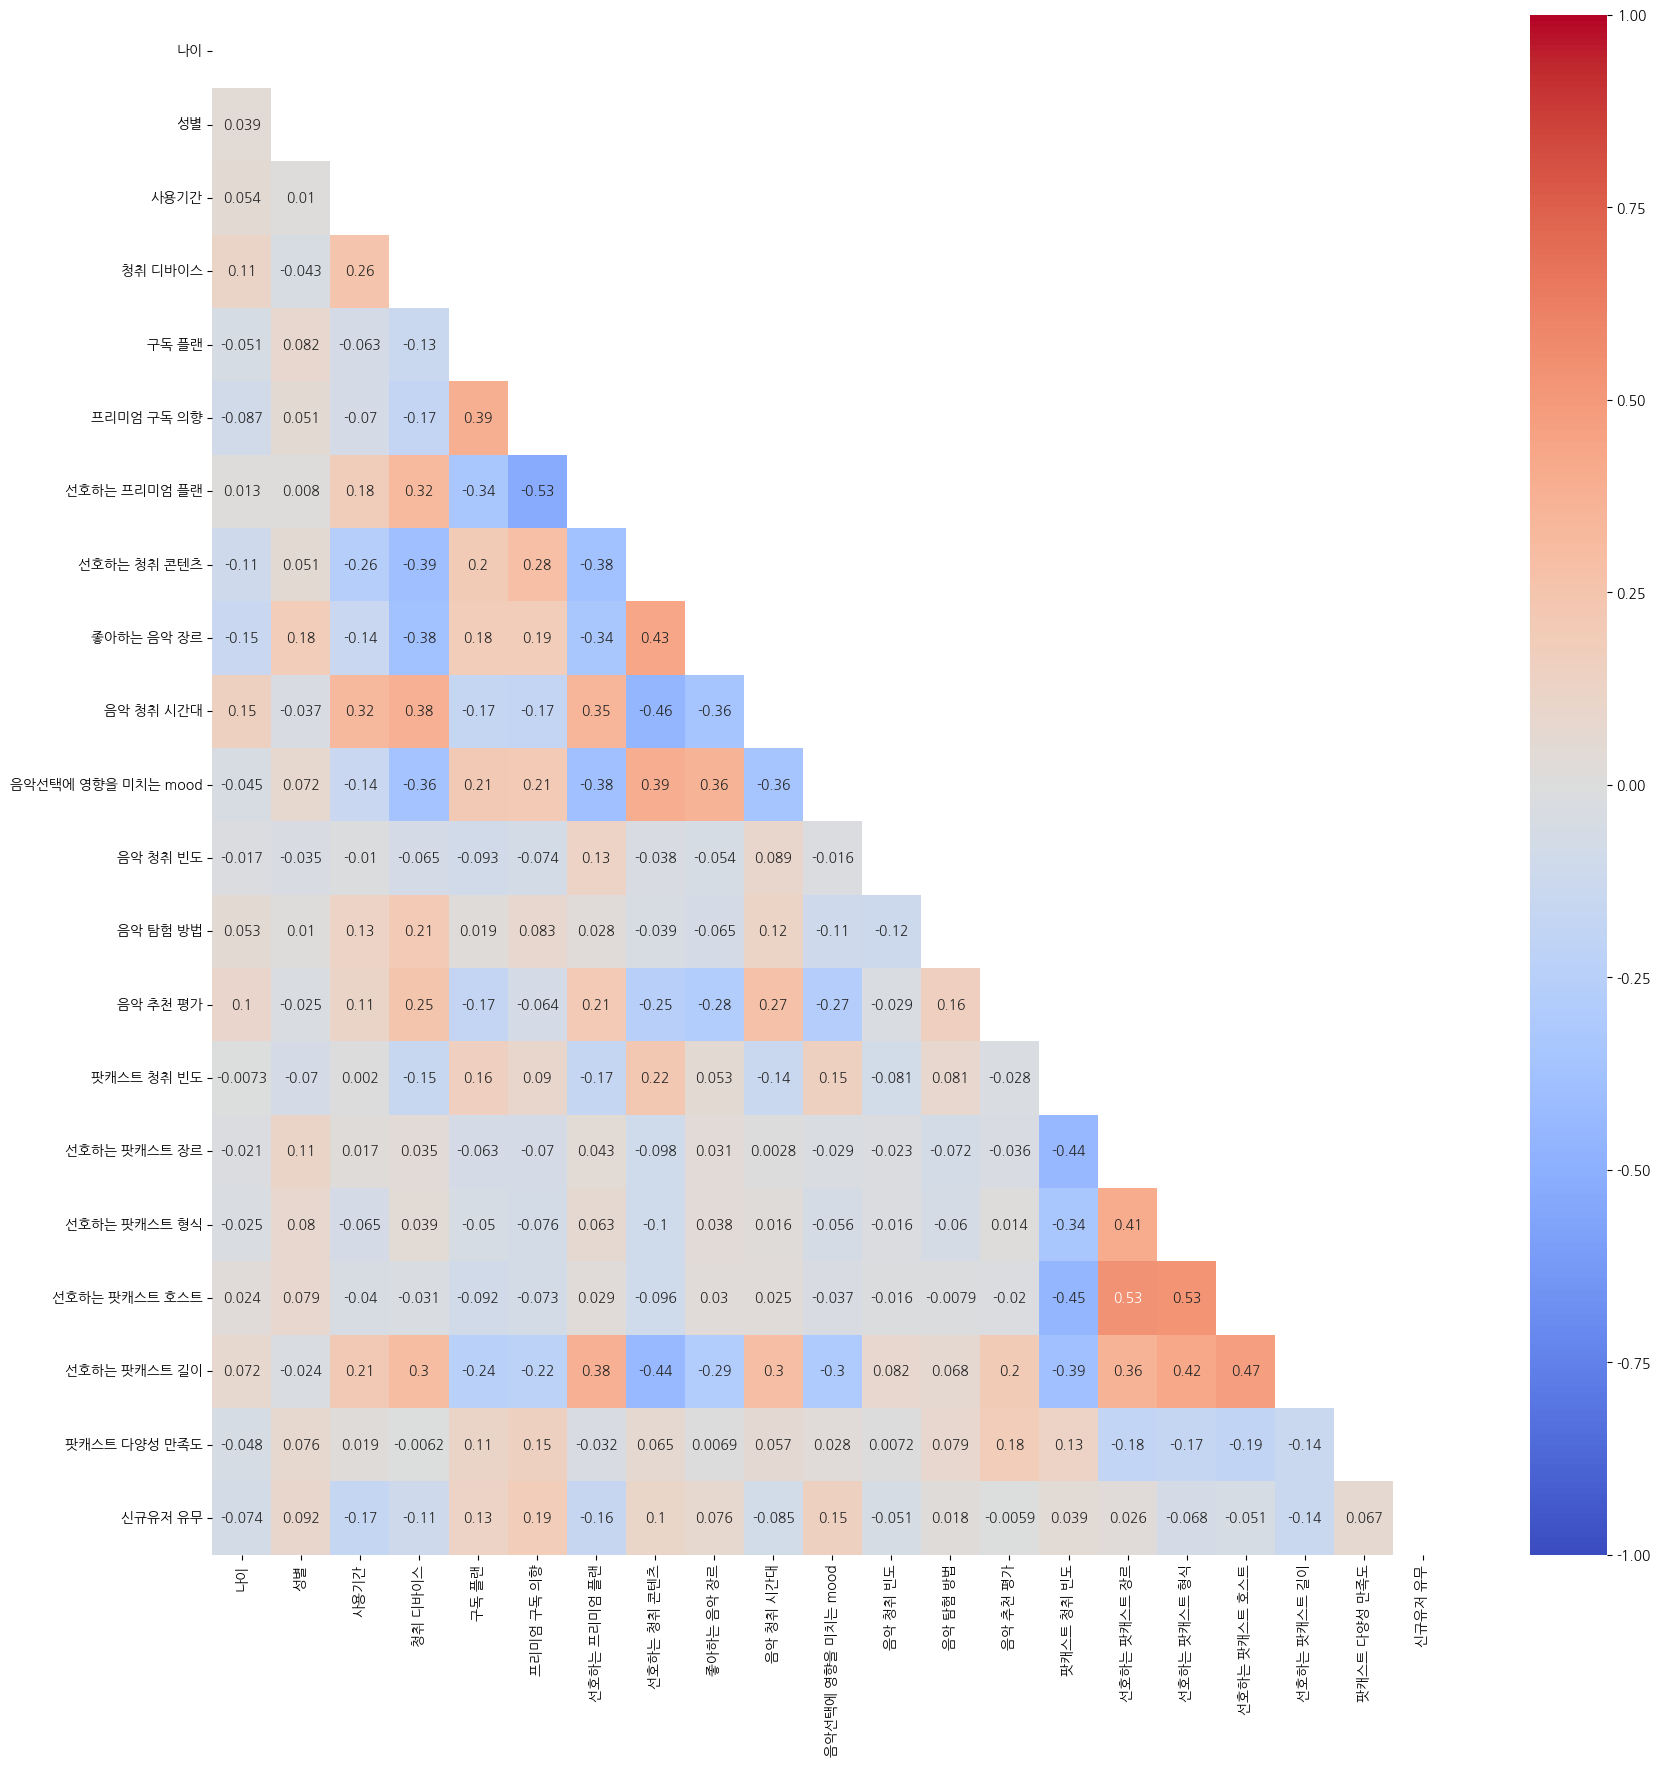

In [44]:
# 히트맵 
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)

- 선호하는 프리미엄 플랜, 프리미엄 구독 의향 0.53
- 좋아하는 음악 장르, 선호하는 청취 콘텐츠 0.43
- 청취 시간대, 선호하는 청취 콘텐츠 0.46

In [45]:
df['선호하는 프리미엄 플랜'].unique()

array(['Family Plan-Rs 179/month', 'Individual Plan- Rs 119/ month',
       'Student Plan-Rs 59/month', nan, 'Duo plan- Rs 149/month'],
      dtype=object)

In [46]:
df['프리미엄 구독 의향'].unique()

array(['Yes', 'No'], dtype=object)

# 주요 인사이트와 가설검정

## 성별-현 구독 플랜 차이

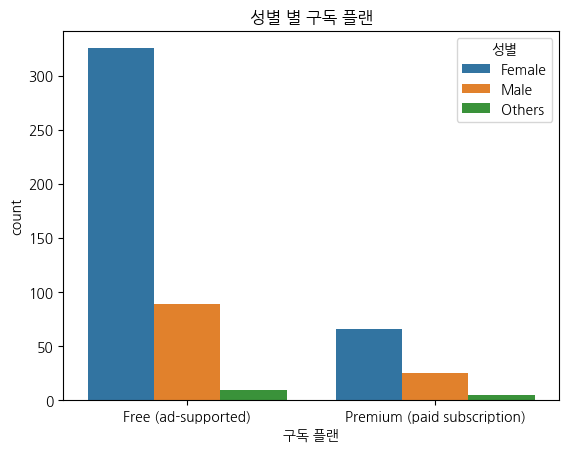

In [47]:
plt.title('성별 별 구독 플랜')
sns.countplot(x='구독 플랜', data=df, hue='성별')
plt.show()

In [83]:
pivot_df = df.pivot_table(index='구독 플랜', columns='성별', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
sex_rate.div(row_sum, axis=1).reset_index()

성별,구독 플랜,Female,Male,Others
0,Free (ad-supported),0.831202,0.780702,0.666667
1,Premium (paid subscription),0.168798,0.219298,0.333333


- 그래프로 보았을 때, 단순히 숫자, 비율로 보았을 때는 여성이 무료 플랜을 남성보다 더 선호한다고 판단됨

In [61]:
df[['성별', '구독 플랜']]

,성별,구독 플랜
0,Female,Free (ad-supported)
1,Male,Free (ad-supported)
2,Others,Free (ad-supported)
3,Female,Free (ad-supported)
4,Female,Free (ad-supported)
...,...,...
515,Female,Free (ad-supported)
516,Female,Free (ad-supported)
517,Female,Free (ad-supported)
518,Female,Premium (paid subscription)


- 귀무가설 : 성별과 현재 구독하고 있는 플랜은 독립이다.
- 대립가설 : 성별과 현재 구독하고 있는 플랜은 종속적이다.

In [65]:
# 카이제곱 독립성 검정 수행
crosstab_result = pd.crosstab(df['성별'], df['구독 플랜'])
chi2, p, _, _ = chi2_contingency(crosstab_result)

# 결과 출력
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서 검정
alpha = 0.05
print("결과:", "차이가 있다" if p < alpha else "차이가 없다")

Chi-square value: 3.7647064820200056
P-value: 0.1522314466334885
결과: 차이가 없다


- 남성과 여성의 유무료 구독 플랜은 차이가 없고 서로 독립적이다.
- 통계적으로 유의하지 않은 인사이트 였던 것으로 판단

## 장기유저와 신규유저의 구독의향

<Axes: title={'center': '프리미엄 구독 의향'}, xlabel='프리미엄 구독 의향', ylabel='count'>

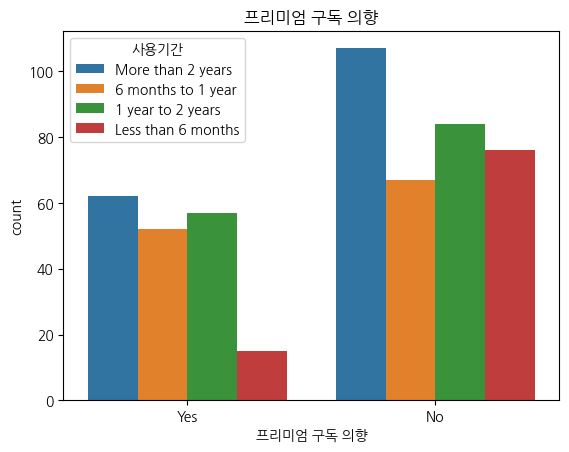

In [78]:
plt.title('프리미엄 구독 의향')
sns.countplot(x='프리미엄 구독 의향', data=df, hue='사용기간')

In [86]:
pivot_df = df.pivot_table(index='프리미엄 구독 의향', columns='사용기간', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
sex_rate.div(row_sum, axis=1).reset_index()

사용기간,프리미엄 구독 의향,1 year to 2 years,6 months to 1 year,Less than 6 months,More than 2 years
0,No,0.595745,0.563025,0.835165,0.633136
1,Yes,0.404255,0.436975,0.164835,0.366864


- 그래프로 보았을 때, 단순히 숫자, 비율로 보았을 때 오래 사용할수록 프리미엄 구독 의향이 있다고 답변함.
    - 2년 이상 사용한 유저 제외
    - 장기고객 중에 무료로 사용하는 사람이 많다는 것?
- 오래 사용하는 거랑 프리미엄 구독의향의 상관관계가 있는지 궁금!!!!!!!!!
    - 귀무가설 : 스포티파이 사용기간과 프리미엄 구독의향은 독립이다.
    - 대립가설 : 스포티파이 사용기간과 프리미엄 구독의향은 종속적이다.

In [87]:
# 카이제곱 독립성 검정 수행
crosstab_result = pd.crosstab(df['프리미엄 구독 의향'], df['사용기간'])
chi2, p, _, _ = chi2_contingency(crosstab_result)

# 결과 출력
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서 검정
alpha = 0.05
print("결과:", "차이가 있다" if p < alpha else "차이가 없다")

Chi-square value: 19.380158032331657
P-value: 0.00022811709367181427
결과: 차이가 있다


- 사용기간과 프리미엄 구독 의향을 카이제곱 검정을 통해 확인해보았을 때, p값이 0.0002로 통계적으로 유의한 관련성이 있다는 것을 발견했다.
- 그러나, 이 둘의 상관계수는 단 0.07
    - 상관 계수가 낮다는 것은 두 변수 간에 선형적인 관계가 약하다는 것을 의미
    - 이는 단일한 '선형 상관 관계'만을 나타내는 지표
- 즉, 상관 관계는 선형 관계만을 측정하기 때문에 상관관계는 낮게 나올지라도 통계적으로 유의했기 때문에 사용기간과 프리미엄 구독 의향에는 비선형적인 관계가 있을 수 있다. 
    - 실제 답변
        - 실제로 앞 3단계에서는 사용기간이 길수록 구독의향이 있다는 답변이 높았지만
        - 가장 오래 스포티파이를 사용한 (2년 이상 사용한) 유저는 오히려 구독의향이 없다고 36%가 응답함
    - 오히려 피어슨 상관계수보다 스피어만 상관계수를 이용했어야 했나?
        - GPT : 따라서 두 변수 간의 상관 관계에 대한 정보를 얻으려면 상관 계수 대신 적절한 비선형 상관 관계를 측정하는 다른 지표(예: 스피어만 상관 계수)를 사용해야 합니다. 그리고 특히 통계적 유의성을 확인하기 위해 추가적인 통계 검정이 필요할 수 있습니다.
        - NO. 스피어만 상관계수를 구해보니 오히려 더 낮게 나옴 0.065

### 스피어만 상관계수

In [95]:
temp

,나이,성별,사용기간,청취 디바이스,구독 플랜,프리미엄 구독 의향,선호하는 프리미엄 플랜,선호하는 청취 콘텐츠,좋아하는 음악 장르,음악 청취 시간대,...,음악 청취 빈도,음악 탐험 방법,음악 추천 평가,팟캐스트 청취 빈도,선호하는 팟캐스트 장르,선호하는 팟캐스트 형식,선호하는 팟캐스트 호스트,선호하는 팟캐스트 길이,팟캐스트 다양성 만족도,신규유저 유무
0,1,0,3,4,0,1,1,1,4,2,...,34,4,3,0,1,2,0,0,1,1
1,0,1,3,0,0,1,2,1,7,0,...,32,4,2,4,1,2,0,3,2,1
2,2,2,1,4,0,1,3,1,6,2,...,19,4,4,2,16,2,3,0,2,1
3,1,0,0,11,0,0,4,0,4,2,...,13,13,4,1,19,4,3,3,1,1
4,1,0,0,6,0,0,4,0,4,2,...,34,13,4,3,10,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,3,10,0,1,3,0,6,1,...,26,10,5,3,10,0,0,2,1,1
516,1,0,3,7,0,1,3,0,6,2,...,29,0,2,3,1,3,0,2,1,1
517,1,0,3,6,0,0,3,0,6,2,...,34,10,3,1,19,3,0,2,1,1
518,1,0,1,6,1,1,2,0,4,2,...,33,11,2,4,1,0,0,1,2,1


In [98]:
# 상관관계 행렬 구하기
correlation_matrix = temp.corr(method='spearman')

<Axes: >

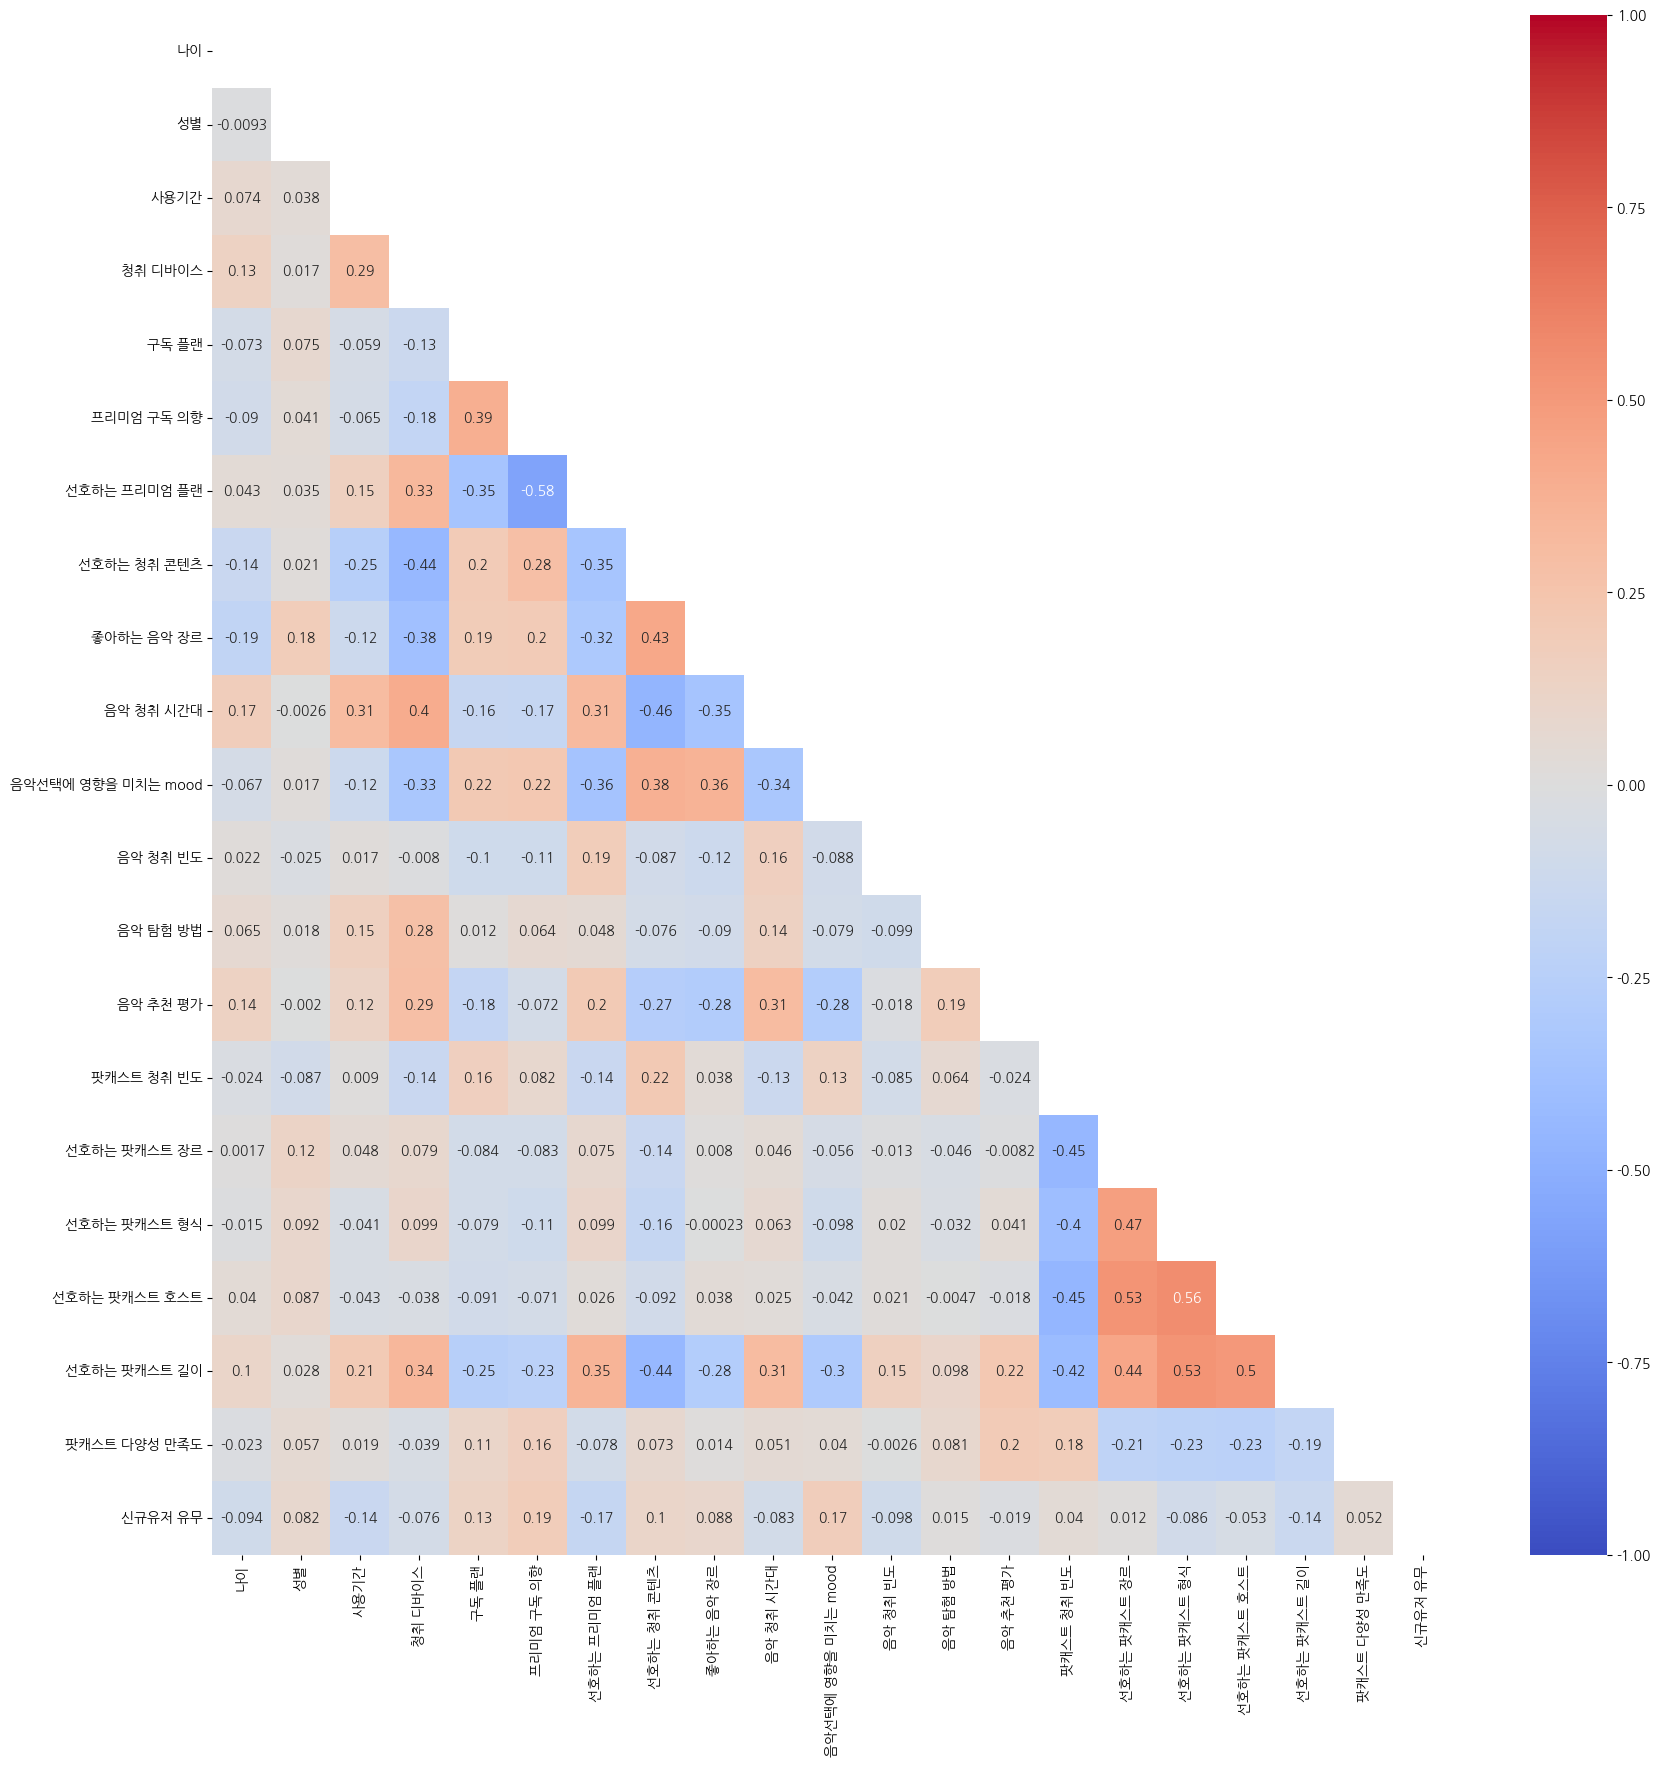

In [99]:
# 히트맵 
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)

### 산점도 그려보기

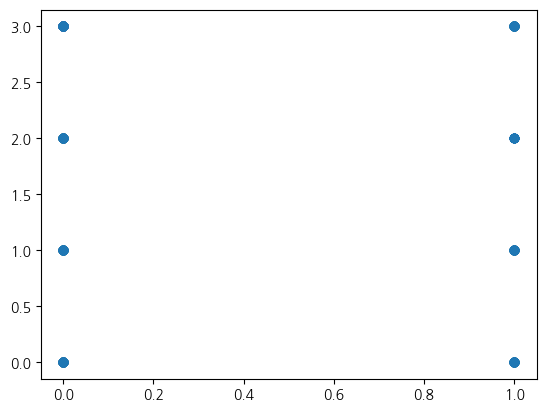

In [105]:
plt.scatter('프리미엄 구독 의향', '사용기간', data=temp)

- omg

# 결론
Spotify BM 및 사용자 행동 데이터셋 분석 후 액션 아이템을 짜는 목적
- 1. 유저 수를 늘린다. (❌)
    - 남성 사용자 20% 여성 75%로, 남성 유저 비율이 적다.
    - 수치상으로 남성은 여성보다 유료 플랜을 사용하는 경향을 확인함. 
        - ➡️ 틈새시장으로 남성 유저를 늘리면, 유료 매출도 증가할 수 있지 않을까? 가설 세움
    - 그러나, 카이제곱 검정을 통해 ```이는 통계적으로 유의한 차이가 아니며(p=0.1522), 성별과 유/무료 플랜은 독립적이라는 결과를 얻었다.``` 
    - 유저 수를 늘리기위해서는 다른 방법 모색 필요
- 2. 무료 -> 유료 플랜으로 전환시켜 수익을 늘린다. (🔺)
    - 장기유저일수록 유료 플랜을 구독한 의향이 높은 것을 확인했다. 
        - 단, 2년이상인 유저제외, 최장기유저들은 구독의향 없다고 36%가 응답
    - 카이제곱 검정을 통해 통계적 검정을 실시해보니, 사용기간과 구독의향에는 (p=0.0002) 통계적으로 유의한 관련성이 있다는 것을 발견했다. 
        - ➡ ```🌟스포티파이 앱을 사용하는 유저를 이탈하지 않고 오래 유지만 한다면, 유료 플랜을 구독할 의향 또한 높아질 수 있음🌟```
- 3. 번외) 수치상으로 음악추천 시스템에 만족할수록 장기적으로 유지하는 것을 확인 
    - 유저를 장기적으로 유지시키기 위해서는 음악추천 시스템에 투자해라~~!!!!!